In [1]:
from data import augmentations
from data import dataset
from data import snapshot

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from statistics import mean
from torch.autograd import Variable
import time
from PIL import Image
import random
from skimage import io, transform
from collections import OrderedDict
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split,Subset
import torchvision
from torch import nn
from PIL import Image, ImageFilter
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from matplotlib import pyplot as plt
from skimage import io, transform
import cv2
import zipfile

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
# data = zipfile.ZipFile('archive.zip', 'r')
# data.extractall('Set')

In [3]:
data = pd.read_csv('Set/kaggle_3m/data.csv')
data.head()
csv_path =   'Set/kaggle_3m/data.csv'
data_folder = 'Set/lgg-mri-segmentation/kaggle_3m'
eg_path = 'Set/lgg-mri-segmentation/kaggle_3m/TCGA_HT_8113_19930809'
eg_img = 'Set/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_10.tif'
eg_mask = 'Set/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_10_mask.tif'

# AUGMENTATIONS

In [4]:
data = dataset.MySet(data_folder)
print('Length of dataset is {}'. format(data.__len__()))
print('sample data: ')
print(data.__len__())
for image, mask in data:
    print(image.shape)
    print(mask.shape)
    break

Length of dataset is 3929
sample data: 
3929
torch.Size([3, 256, 256])
torch.Size([1, 256, 256])


In [5]:
trainset, valset = random_split(data, [3600, 329])

train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=10,shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=valset, batch_size=10)

In [6]:
def image_convert(image):
    image = image.clone().cpu().numpy()
    image = image.transpose((1,2,0))
#     image = (image * 255)
    return image

def mask_convert(mask):
    mask = mask.clone().cpu().detach().numpy()
    return np.squeeze(mask)

def plot_img(no_):
    iter_ = iter(train_loader)
    images,masks = next(iter_)
    images = images.to(device)
    masks = masks.to(device)
    plt.figure(figsize=(20,10))
    for idx in range(0,no_):
         image = image_convert(images[idx])
         plt.subplot(2,no_,idx+1)
         plt.imshow(image)
    for idx in range(0,no_):
         mask = mask_convert(masks[idx])
         plt.subplot(2,no_,idx+no_+1)
         plt.imshow(mask,cmap='gray')
    plt.show()

In [7]:
# plot_img(2)

# Исходные картинки

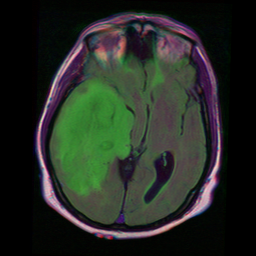

In [8]:
img1 = Image.open(eg_img)
msk1 = Image.open(eg_mask)
img1

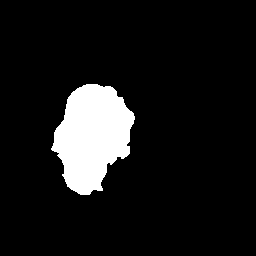

In [9]:
msk1

# pil -> snapshot -> pil

In [10]:
from data.dataset import Snapshot

In [11]:
snp = Snapshot(img1, msk1)

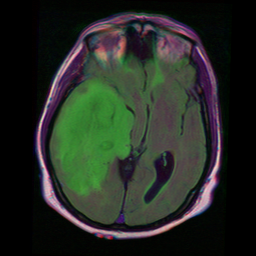

In [20]:
from_t4 = Snapshot.tensor_4_to_snapshot(snp.to_tensor_4())
from_t4.get_img_pil()

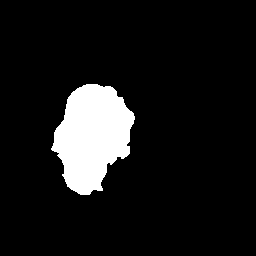

In [21]:
from_t4.get_mask_pil()